<a href="https://colab.research.google.com/github/RodMendez/entropyGalxiesML/blob/main/MC_DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install getdist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.7/826.7 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for getdist: filename=getdist-1.5.3-py3-none-any.whl size=810925 sha256=a62f4bb5a68baef89b0650b59897d1fea13c22dd08760faccce7fd54f4529d2e
  Stored in directory: /root/.cache/pip/wheels/75/16/7c/bfc6ad49f7f1b7f914b50bb483a71e6bc29c18cd97f3611878
Successfully built getdist


In [2]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *


In [3]:
# import planckStyle
import pylab
import numpy as np
# import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

In [4]:
!pip install fgivenx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 7.2 MB/s eta 0:00:00


In [5]:
!pip install astroNN


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.9/912.9 kB 33.1 MB/s eta 0:00:00


In [6]:
# import planckStyle
import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains, plot_lines, plot_dkl

# matplotlib.use('TkAgg')
%matplotlib inline

In [7]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, euclidean_distances, median_absolute_error
import numpy as np
import pandas as pd
from astroNN.nn.layers import MCDropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import scipy.integrate as intg
from scipy.misc import derivative
from scipy.integrate import quad
import seaborn as sns
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess

In [8]:
data = pd.read_csv("Mayor R  (R500).csv")

In [9]:
# Imprimir las columnas del dataset
print(data.columns)

Index(['Nombre', 'Rmax rayos X', 'nelec', 'Tx', 'S', 'σLOS', 'Rvir', 'Mvir',
       'A', 'Hz', 'R500', 'CC'],
      dtype='object')


# **Escalamos los datos**

Ya que los datos provenientes de observaciones del óptico tienen magnitudes distintas a las de aquellos provenientes en Rayos-X, es necesario escalar


In [56]:
from sklearn.preprocessing import StandardScaler

x = df_data[['Rmax rayos X', 'nelec', 'Tx', 'σLOS', 'Rvir', 'Mvir']]

# Inicializa el escalador
scaler_general = StandardScaler()

# Ajusta el escalador a las variables de entrada
scaler.fit(x)

# Aplica la transformación
x_scaled = scaler.transform(x)


In [57]:
df_data = data[['Rmax rayos X', 'nelec', 'Tx', 'σLOS', 'Rvir', 'Mvir', 'Hz', 'S']]

# Define las variables de entrada y salida ya escaladas
x_scaled = scaler.transform(df_data[['Rmax rayos X', 'nelec', 'Tx', 'σLOS', 'Rvir', 'Mvir']].values)  # Variables de entrada escaladas
y_scaled = scaler_output.transform(df_data[['Hz', 'S']].values)  # Variables de salida escaladas

# Encuentra los valores mínimos y máximos de las variables de entrada escaladas
xmin, xmax = np.min(x_scaled), np.max(x_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador
scaler = StandardScaler()
"""
# Ajusta el escalador a las variables de entrada
scaler.fit(x)

# Aplica la transformación
x_scaled = scaler.transform(x)
"""

'\n# Ajusta el escalador a las variables de entrada\nscaler.fit(x)\n\n# Aplica la transformación\nx_scaled = scaler.transform(x)\n'

In [13]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador para los datos de salida
scaler = StandardScaler()

y = data[['Hz', 'S']].values

# Inicializar y ajustar el escalador para los datos de salida
scaler_output = StandardScaler()
scaler_output.fit(y)  # Ajustar el escalador a tus datos de salida
y_scaled = scaler_output.transform(y)  # Escalar los datos de salida


In [42]:
# Ajustar el escalador solo a la columna 'Rmax rayos X'
scaler_rmax = StandardScaler()  # Escalador específico para 'Rmax rayos X'
scaler_rmax.fit(data[['Rmax rayos X']])

print(x_scaled)

[[-0.26833662]
 [ 0.11841823]
 [-0.45043369]
 [ 0.13775597]
 [ 0.13614449]
 [-0.28122845]
 [-0.48588622]
 [-0.543416  ]
 [-0.16681347]
 [-0.38436307]
 [-0.12008059]
 [-0.58241378]
 [-0.19904304]
 [-0.22321522]
 [-0.19259713]
 [-0.23449557]
 [-0.06206737]
 [ 0.13292153]
 [-0.47460587]
 [-0.20710043]
 [ 0.19899215]
 [-0.02822632]
 [-0.3521335 ]
 [-0.55163454]
 [-0.50522396]
 [ 1.01923472]
 [-0.15875608]
 [ 0.49711568]
 [-0.27478253]
 [ 0.13453301]
 [ 0.09746901]
 [ 0.07329683]
 [-0.34891054]
 [-0.3972549 ]
 [-0.43270743]
 [-0.34891054]
 [ 5.77309635]
 [-0.0443411 ]]


Por ahora se usará solo una entrada, en este caso Rmax rayos

Preparamos una curva suavizada que nos permitirá visualizar las predicciones generadas por el modelo junto con la incertidumbre asociada. La curva está diseñada para representar las predicciones centrales, así como las bandas de incertidumbre superior e inferior, basadas en la desviación estándar de las predicciones (incertidumbre).

In [43]:
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess

def get_smoothed_curve(rmax_scaled, prediction, sigma, curve_type='lower', frac=0.05):
    """
    Obtener la curva suavizada basada en las predicciones y el tipo de curva.

    Parámetros:
    - rmax_scaled: Variable de entrada 'Rmax rayos X' escalada.
    - prediction: Valores predichos centrales (media de las predicciones), escalados si es necesario.
    - sigma: Desviación estándar de las predicciones (incertidumbre).
    - curve_type: String, 'upper' o 'lower'. Especifica si devolver la curva superior o inferior.
    - frac: Fracción para el suavizado LOWESS.

    Retorna:
    - smoothed_curve: Array con dos columnas: la primera con los valores x y la segunda con los valores y de la curva suavizada.
    """
    # Determinar el tipo de curva (superior o inferior)
    if curve_type == 'lower':
        prediction_curve = prediction - sigma
    elif curve_type == 'upper':
        prediction_curve = prediction + sigma
    else:
        raise ValueError("curve_type debe ser 'upper' o 'lower'")

    # Interpolación
    f = interp1d(rmax_scaled.flatten(), prediction_curve, fill_value="extrapolate")

    # Nuevo rango de valores escalados X para la interpolación
    new_X = np.linspace(min(rmax_scaled.flatten()), max(rmax_scaled.flatten()), 100)

    # Valores interpolados
    interpolated_values = f(new_X)

    # Suavizado de la curva usando LOWESS
    smoothed_curve = lowess(interpolated_values, new_X.ravel(), frac=frac)

    return smoothed_curve


Calculamos los valores mínimos y máximos de las variables de entrada (xmin, xmax) para tener una idea del rango de los datos. Estos valores pueden ser útiles más adelante, por ejemplo, en la normalización o para graficar.


Comprobamos la forma de los datos que el modelo espera recibir para ver si es consistente

Cargamos el modelo. Este modelo se construyo para otros fines con otros datos.

¿Ahora, solo con cargarlo, puedo usarlo con mis datos?

In [44]:
from keras.metrics import MeanSquaredError

#Carga el modelo desde la ubicación actual
model = tf.keras.models.load_model('large_lsst_model.h5', custom_objects={'MCDropout': MCDropout,'mse': MeanSquaredError()})

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [45]:
print(model.input_shape)

(None, 1)


 Generamos predicciones para Hz y S utilizando Monte Carlo Dropout

In [47]:
# Genera datos de prueba solo para Rmax rayos X
# Extraer y escalar solo Rmax rayos X
#rmax_scaled = x_scaled[:, 0].reshape(-1, 1)

x_scaled = scaler.transform(data[['Rmax rayos X']])  # Escalar 'Rmax rayos X'

# Parámetros
test_batch_size = len(rmax_scaled)  # Usa el tamaño del conjunto de datos escalado
mc_dropout_num = 100  # Ejecuta Dropout 150 veces

# Inicializa matrices para almacenar predicciones y varianza
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))  # 2 es el número de salidas: Hz y S

# Ejecuta Monte Carlo Dropout
for j in range(mc_dropout_num):
    predictions[j] = model.predict(rmax_scaled)  # Usa solo Rmax rayos X

# Obtiene los resultados promedio y su varianza
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

# Imprimir resultados
print("Predicciones promedios (Hz y S):")
print(prediction_mc_dropout)
print("Desviación estándar (incertidumbre):")
print(std_mc_dropout)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━

In [48]:
# Desescalar las predicciones para Hz y S al mismo tiempo
prediction_mc_dropout_descaled = scaler_output.inverse_transform(prediction_mc_dropout)

# Extraer los valores desescalados de Hz y S
prediction_mc_dropout_Hz = prediction_mc_dropout_descaled[:, 0]  # Desescalar solo Hz
prediction_mc_dropout_S = prediction_mc_dropout_descaled[:, 1]  # Desescalar solo S


In [49]:
# Desescalar Rmax rayos X
#rmax_descaled = rmax_scaled.inverse_transform(x_scaled[:, 0].reshape(-1, 1))  # Usar scaler_rmax para desescalar

rmax_descaled = scaler.inverse_transform(x_scaled[:, 0].reshape(-1, 1))  # Usar scaler para desescalar Rmax rayos X

print(rmax_descaled)

[[0.251 ]
 [0.491 ]
 [0.138 ]
 [0.503 ]
 [0.502 ]
 [0.243 ]
 [0.116 ]
 [0.0803]
 [0.314 ]
 [0.179 ]
 [0.343 ]
 [0.0561]
 [0.294 ]
 [0.279 ]
 [0.298 ]
 [0.272 ]
 [0.379 ]
 [0.5   ]
 [0.123 ]
 [0.289 ]
 [0.541 ]
 [0.4   ]
 [0.199 ]
 [0.0752]
 [0.104 ]
 [1.05  ]
 [0.319 ]
 [0.726 ]
 [0.247 ]
 [0.501 ]
 [0.478 ]
 [0.463 ]
 [0.201 ]
 [0.171 ]
 [0.149 ]
 [0.201 ]
 [4.    ]
 [0.39  ]]


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluar rendimiento para Hz
mse_Hz = mean_squared_error(y_descaled[:, 0], prediction_mc_dropout_descaled[:, 0])
mae_Hz = mean_absolute_error(y_descaled[:, 0], prediction_mc_dropout_descaled[:, 0])
r2_Hz = r2_score(y_descaled[:, 0], prediction_mc_dropout_descaled[:, 0])

print("Rendimiento del modelo para Hz:")
print(f"Mean Squared Error (MSE): {mse_Hz:.4f}")
print(f"Mean Absolute Error (MAE): {mae_Hz:.4f}")
print(f"R² Score: {r2_Hz:.4f}")

# Evaluar rendimiento para S
mse_S = mean_squared_error(y_descaled[:, 1], prediction_mc_dropout_descaled[:, 1])
mae_S = mean_absolute_error(y_descaled[:, 1], prediction_mc_dropout_descaled[:, 1])
r2_S = r2_score(y_descaled[:, 1], prediction_mc_dropout_descaled[:, 1])

print("\nRendimiento del modelo para S:")
print(f"Mean Squared Error (MSE): {mse_S:.4f}")
print(f"Mean Absolute Error (MAE): {mae_S:.4f}")
print(f"R² Score: {r2_S:.4f}")


Rendimiento del modelo para Hz:
Mean Squared Error (MSE): 342.5853
Mean Absolute Error (MAE): 18.4974
R² Score: -1636.7112

Rendimiento del modelo para S:
Mean Squared Error (MSE): 12051250368.5895
Mean Absolute Error (MAE): 87200.9044
R² Score: -1.7097


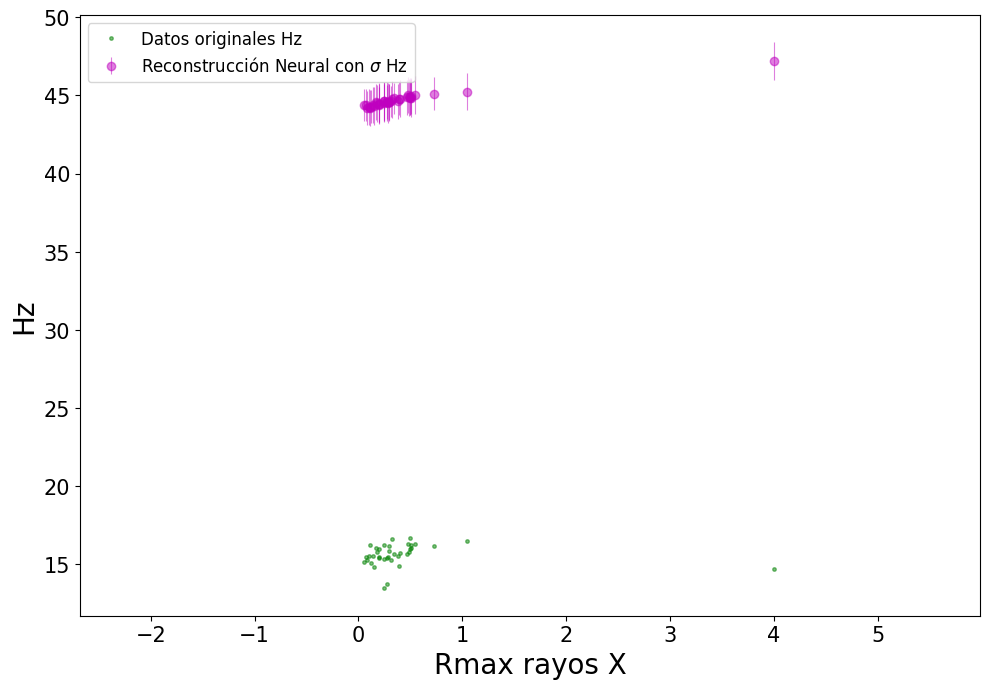

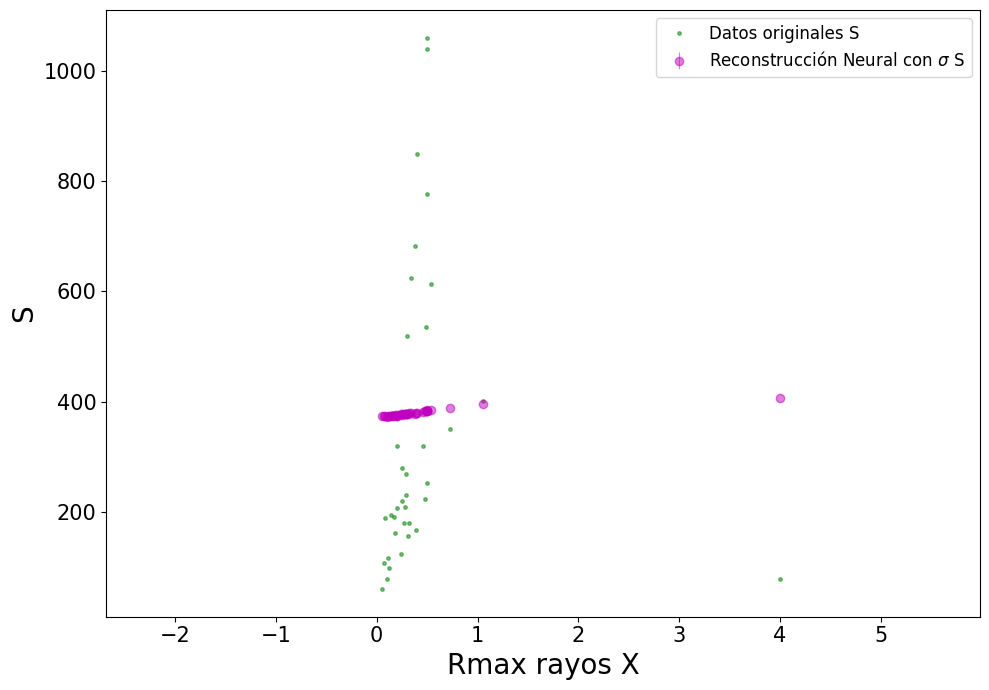

In [63]:
# Graficar Hz
sigma_Hz = np.sqrt(std_mc_dropout[:, 0]**2)  # Desviación estándar para Hz

plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(df_data['Rmax rayos X'], y[:, 0], fmt='g.', markersize=5, alpha=0.5, label='Datos originales Hz')
plt.errorbar(df_data['Rmax rayos X'], prediction_mc_dropout_Hz, yerr=sigma_Hz, fmt='o',
             ecolor='m', capthick=2, elinewidth=0.8, alpha=0.5, c='m',
             label='Reconstrucción Neural con $\sigma$ Hz')

plt.xlim(xmin-0.01, xmax+0.01)
plt.xlabel("Rmax rayos X", fontsize=20)
plt.ylabel("Hz", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('reconstruccion_Hz.png', dpi=100)
plt.show()

# Graficar S
sigma_S = np.sqrt(std_mc_dropout[:, 1]**2)  # Desviación estándar para S

plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(df_data['Rmax rayos X'], y[:, 1], fmt='g.', markersize=5, alpha=0.5, label='Datos originales S')
plt.errorbar(df_data['Rmax rayos X'], prediction_mc_dropout_S, yerr=sigma_S, fmt='o',
             ecolor='m', capthick=2, elinewidth=0.8, alpha=0.5, c='m',
             label='Reconstrucción Neural con $\sigma$ S')

plt.xlim(xmin-0.01, xmax+0.01)
plt.xlabel("Rmax rayos X", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('reconstruccion_S.png', dpi=100)
plt.show()
